In [93]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)

data = imagenes.reshape((n_imagenes, -1))
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.7)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

cov = np.cov(x_train.T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

def prob(x, vector, mu, sigma):
    Ps=1
    for i in x:
        comp = np.dot(i,vector)
        Ps=Ps*1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((comp-mu)/sigma)**2) 
    return Ps

def find(x, vector, dim):
    sigmas = np.zeros((10,dim))
    mus = np.zeros((10,dim))
    for i in range(10):
        x_t = x_train[y_train == i]
        for j in range(dim):
            mus[i,j] = np.mean(x_t @ vector[:,j])
            sigmas[i,j] = np.std(x_t @ vector[:,j])
    return mus, sigmas
                
def probdig(x, dig, dim):
    Probl = np.zeros(dim)
    for i in range(dim):
        comp = np.dot(x, vectores[:,i])
        Probl[i] = 1/(sigmas[dig,i]*np.sqrt(2*np.pi))*np.exp(-1/2*((comp-mus[dig,i])/sigmas[dig,i])**2)
    P = np.prod(Probl)
    return P

def predict(x, dim):
    Probs = np.zeros(10)
    for i in range(10):
        Probs[i] = probdig(x, i, dim)
    return np.argmax(Probs)

def model(N, dim):
    Predict = np.zeros(N)
    Etiqueta = np.zeros(N)
    for muestra in range(N):
        xm = x_train[muestra]
        Predict[muestra] = predict(xm, dim) 
        Etiqueta[muestra] = y_train[muestra]
    cm = confusion_matrix(Etiqueta, Predict)
    efi = np.sum(Etiqueta == Predict)/N
    return Etiqueta, Predict, cm, efi

Train: 0.9307875894988067
Test: 0.924074074074074


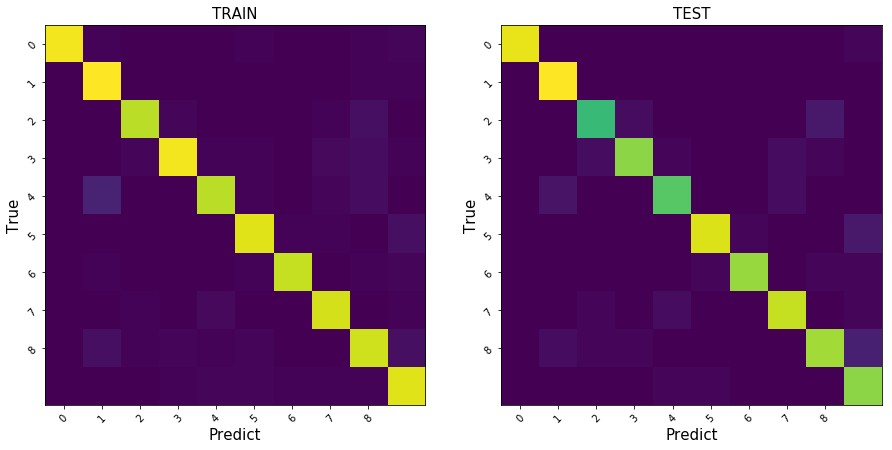

In [109]:
dim = 50
mus, sigmas = find(x_train, vectores, dim)
test = model(np.shape(x_test)[0], dim)
train = model(np.shape(x_train)[0], dim)
print('Train:', train[3])
print('Test:', test[3])

plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(train[2], interpolation='nearest')
tick_marks = np.arange(9)
classNames = ['0','1','2','3','4','5','6','7','8','9']
plt.title('TRAIN', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.xlabel('Predict', fontsize=15)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames, rotation=45)

plt.subplot(1, 2, 2)
plt.imshow(test[2], interpolation='nearest')
plt.title('TEST', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.xlabel('Predict', fontsize=15)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames, rotation=45)

plt.show()